# Neural Networks

Note: this notebook is partly based on pp.106-120 of "Introduction to Machine Learning with Python". Some code snippets are directly taken from that source.

### Part 1: The Linear Version: Perceptron

In [28]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons,make_blobs
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix,precision_score,recall_score,f1_score,
    roc_curve,roc_auc_score,precision_recall_curve,accuracy_score,classification_report)
from sklearn.utils import shuffle

We start with a very simple, linearly separable dataset:

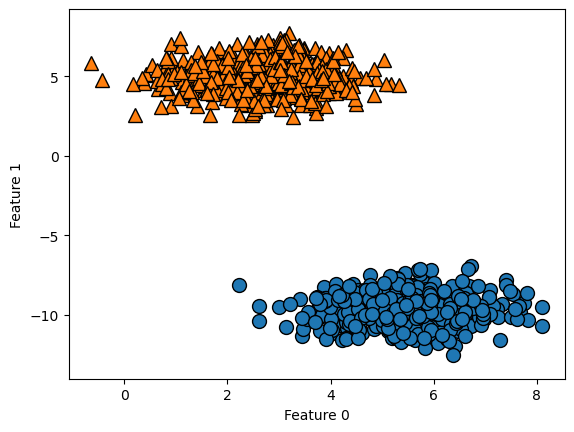

In [29]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=10)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Learning a perceptron, and plotting the decision regions:

Number of outputs: 1, output activations: logistic


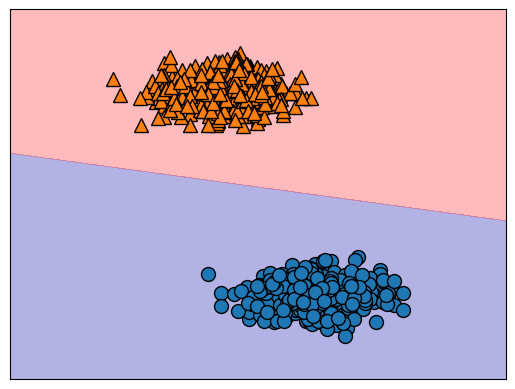

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=[],activation='identity',solver='lbfgs', random_state=4).fit(X, y)
print('Number of outputs: {}, output activations: {}'.format(mlp.n_outputs_,mlp.out_activation_))
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

The perceptron learns a linear decision boundary that separates the two classes. Observe that the 'activation' parameter only sets the activation function for hidden neurons, not the output.

We next add an "outlier" to the blue class:

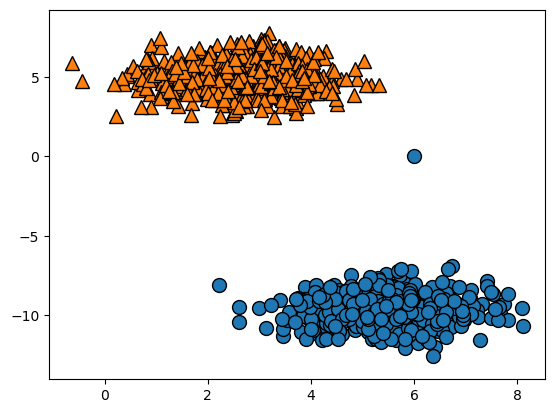

In [4]:
#X = np.vstack([X,[6.5,-1.0]])
X = np.vstack([X,[6,0.0]])
y = np.append(y,0.0)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

We learn again:

Loss: 2.0228289004744713e-05


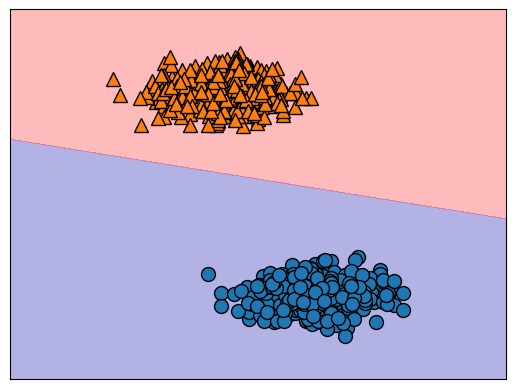

In [41]:
seed =3
mlp = MLPClassifier(hidden_layer_sizes=[],activation='identity',solver='lbfgs', random_state=seed).fit(X, y)
print("Loss: {}".format(mlp.loss_))
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

The decision boundary is shifted, so that the blue outlier still gets correctly classified. But **note**: the Sklearn implementation of MLPClassifier does not minimize the traditional Perceptron loss shown on Slide 11. It minimizes the *log-loss*, which in this case still leads to minimizing the misclassification error.

Compare with SVM:

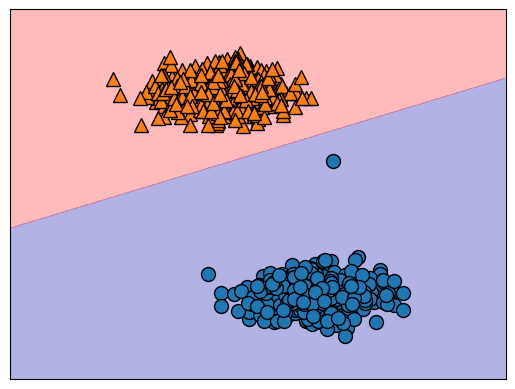

In [6]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear').fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

Compare with Naive Bayes:

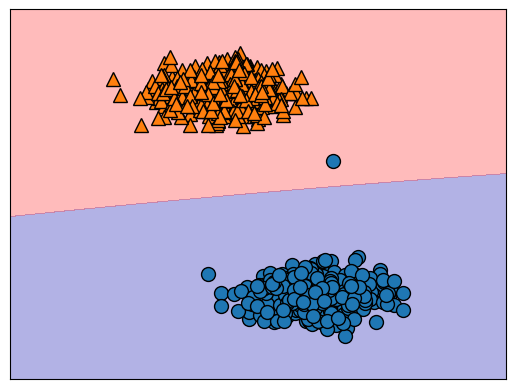

In [7]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X,y)
mglearn.plots.plot_2d_separator(nb, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

Naive Bayes does not avoid mis-classifications "at all cost". Also correctly classified examples count: the higher the likelihood, the better.

### Part 2: The nonlinear case: adding hidden layers

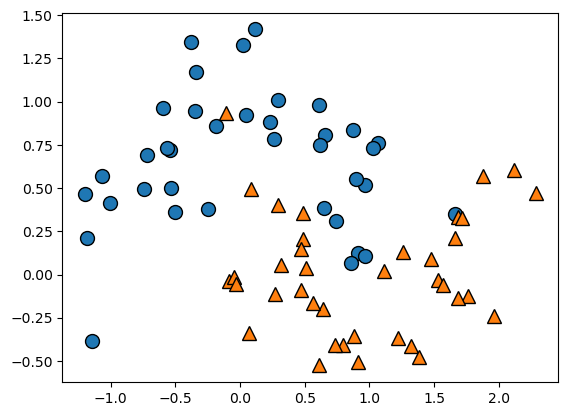

In [8]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

A first NN with one hidden layer with 10 nodes:

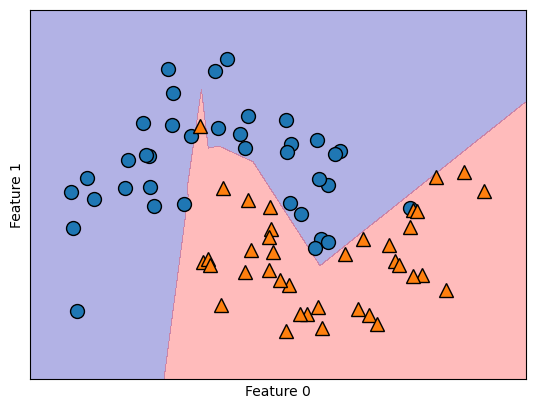

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=[10],activation='relu',solver='lbfgs', random_state=0, max_iter=500).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

The decision boundary is piecewise linear. The different line segments correspond to different subsets of hidden units that output '0'. The output unit then computes a linear function of the outputs from the other hidden units, which is a linear function of the input. This is also still the case with several hidden 'relu' layers:

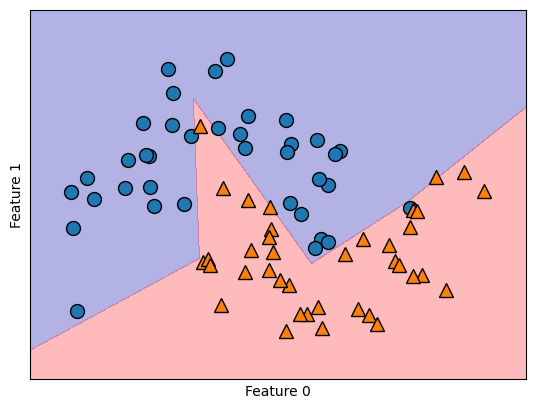

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=[5,5],activation='relu',solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

With a 'tanh' activation function, the boundary becomes smooth:

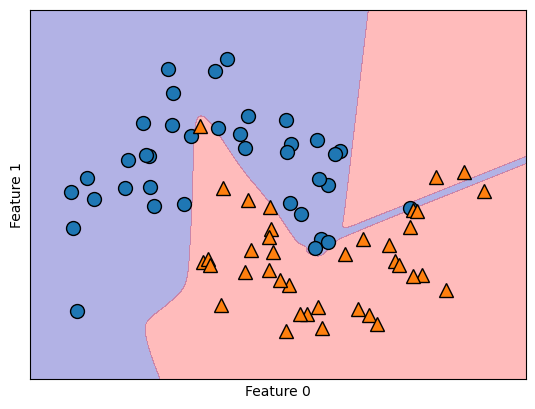

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=[10,10],activation='tanh',solver='lbfgs').fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Beware: with this small datasize, the result is very unstable with respect to the random initialization:

/home/kenneth/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


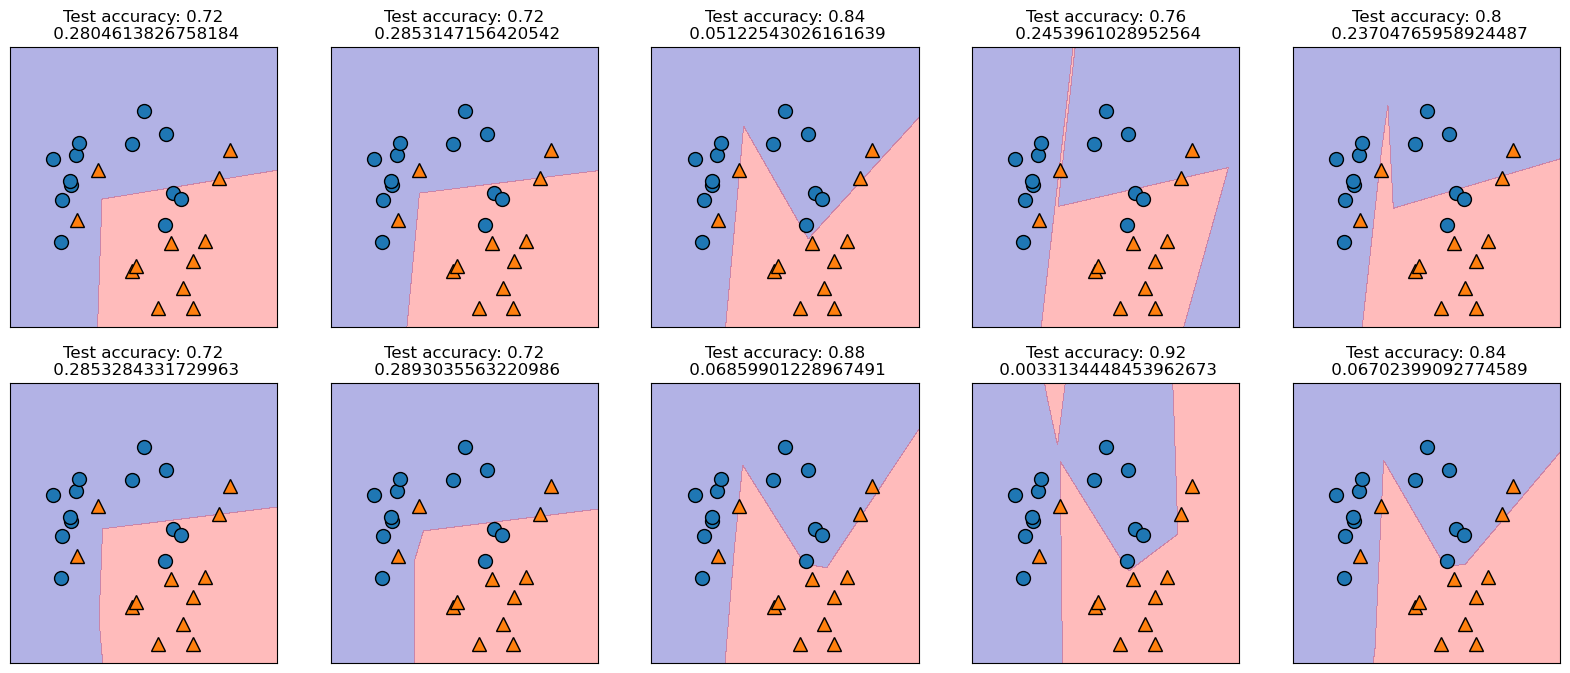

In [52]:
randstates = np.arange(10)
accuracies = np.zeros(10)
losses=np.zeros(10)
hiddenlayer = 5
fig,axes = plt.subplots(2,5,figsize=(20,8))
for i in randstates:
    currentax = axes.ravel()[i]
    mlp = MLPClassifier(hidden_layer_sizes=[hiddenlayer],activation='relu',solver='lbfgs', random_state=i*10).fit(X_train, y_train)
    accuracies[i]=mlp.score(X_test,y_test)
    losses[i]=mlp.loss_
    currentax.set_title("Test accuracy: {}\n {}".format(accuracies[i],losses[i]))
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3,ax=currentax)
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,ax=currentax)

**Exercise:** investigate how the variability and accuracy of the results depends on the structure of the NN as defined by hidden_layer_sizes

### Part 3: Solvers and Regularization

Trying regularization: starting with a relatively small sample (N=500), and lbfgs solver:

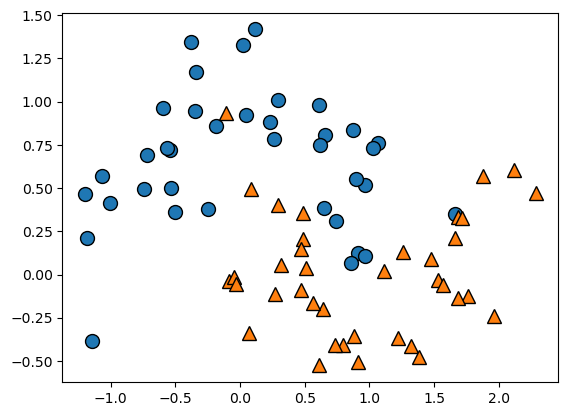

In [13]:
X, Y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, stratify=Y, random_state=42)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], Y_train)
plt.show()

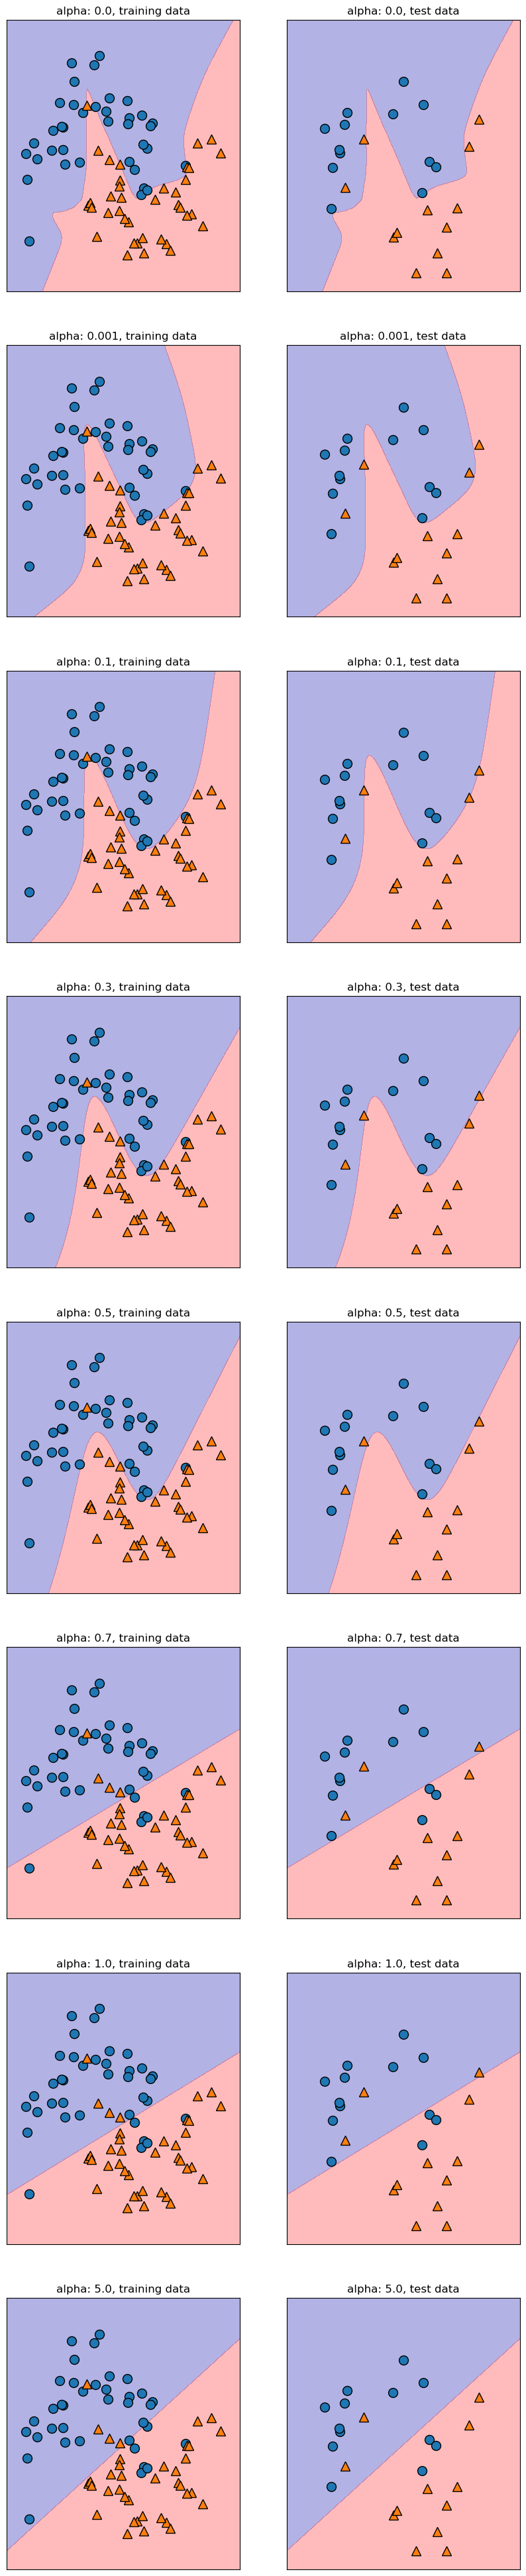

In [14]:
alphas = np.array([0.0,0.001,0.1,0.3,0.5,0.7,1.0,5.0])
train_accs = np.zeros(alphas.size)
test_accs = np.zeros(alphas.size)

fig,axes = plt.subplots(alphas.size,2,figsize=(10,50))

for i,a in enumerate(alphas):
    mlp = MLPClassifier(hidden_layer_sizes=[10,10],activation='tanh',solver='lbfgs', max_iter=2000,\
                        alpha=a,random_state=5).fit(X_train,Y_train)
    train_pred=mlp.predict(X_train)
    test_pred=mlp.predict(X_test)
    train_accs[i]=accuracy_score(train_pred,Y_train)
    test_accs[i]=accuracy_score(test_pred,Y_test)
    
    currentax = axes[i,0]
    currentax.set_title("alpha: {}, training data".format(a))
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3,ax=currentax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],Y_train,ax=currentax)
    
    currentax = axes[i,1]
    currentax.set_title("alpha: {}, test data".format(a))
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3,ax=currentax)
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],Y_test,ax=currentax)
    

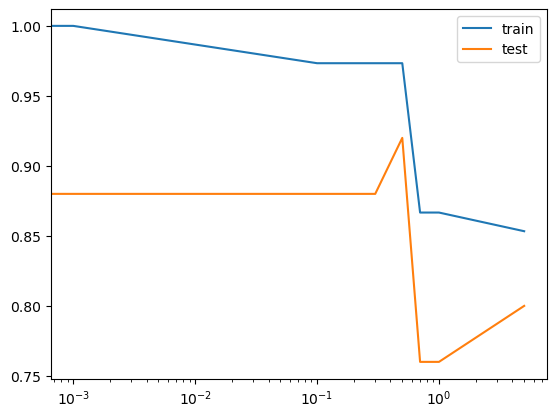

In [15]:
plt.xscale('log')    
plt.plot(alphas,train_accs,label='train')
plt.plot(alphas,test_accs,label='test')
plt.legend()
plt.show()

**Exercise:** Investigate the effect of the alpha regularization parameter in connection with other data/model/learning parameters: 
<ul>
    <li>the noise level in the make_moons data generator</li>
    <li>the neural network structure</li>
    <li>the activation function</li>
    <li>the choice of the solver (try Adam instead of lbfgs)</li>
</ul>
When does the alpha parameter make a big difference in what is learned, and when is it beneficial in improving the accuracy on the test set?